In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
Xtrain = pickle.load(open('Xtrain_ANN.data', 'rb'))
Ytrain = pickle.load(open('Ytrain_ANN.data', 'rb'))

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

Using TensorFlow backend.


In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
earlystop = EarlyStopping(patience=20, restore_best_weights=True)

reduce_learning = ReduceLROnPlateau(patience=5, verbose=1, cooldown=10)

In [6]:
callbacks = [earlystop, reduce_learning]

In [7]:
clf = Sequential()

In [8]:
clf.add(Dense(units=400, activation='relu', input_dim=598))
clf.add(BatchNormalization())
clf.add(Dropout(rate=0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
clf.add(Dense(units=400, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dropout(rate=0.25))

In [10]:
clf.add(Dense(units=400, activation='relu'))
clf.add(BatchNormalization())
clf.add(Dropout(rate=0.25))

In [11]:
clf.add(Dense(units=1, activation='sigmoid'))

In [12]:
clf.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               239600    
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               160400    
__________

In [14]:
history = clf.fit(Xtrain, Ytrain, epochs=100, batch_size=64, validation_split=0.2, shuffle=True, callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 472432 samples, validate on 118108 samples
Epoch 1/100
472432/472432 [==============================] - 46s 98us/step - loss: 0.1237 - acc: 0.9674 - val_loss: 0.1167 - val_acc: 0.9701
Epoch 2/100
472432/472432 [==============================] - 45s 96us/step - loss: 0.1108 - acc: 0.9716 - val_loss: 0.1182 - val_acc: 0.9700
Epoch 3/100
472432/472432 [==============================] - 45s 96us/step - loss: 0.1085 - acc: 0.9722 - val_loss: 0.2640 - val_acc: 0.9602
Epoch 4/100
472432/472432 [==============================] - 45s 96us/step - loss: 0.1071 - acc: 0.9724 - val_loss: 0.2715 - val_acc: 0.9597
Epoch 5/100
472432/472432 [==============================] - 45s 96us/step - loss: 0.1066 - acc: 0.9727 - val_loss: 0.2722 - val_acc: 0.9596
Epoch 6/100
472432/472432 [==============================] - 45s 96us/step - loss: 0.1053 - acc: 0.9727 - val_loss: 0.2753 - val_acc: 0.9596

Epoch 00006: ReduceLROnPlateau reducing learning rate

In [15]:
clf.evaluate(Xtrain,Ytrain)

590540/590540 [==============================] - 20s 33us/step


[0.10965322987013251, 0.9711806143529651]

In [16]:
clf.save('clf_ANN_modv2.h5')

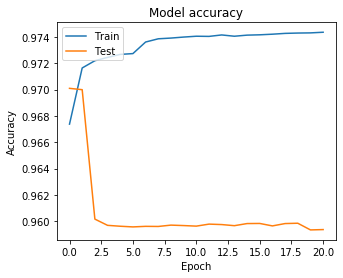

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(5, 4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

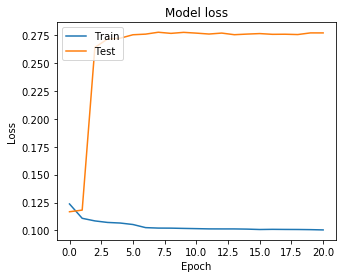

In [18]:
# Plot training & validation loss values
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import log_loss, classification_report, confusion_matrix

In [20]:
Ytrain_ = clf.predict(Xtrain) > 0.5

In [21]:
print(log_loss(Ytrain, Ytrain_))
print(confusion_matrix(Ytrain, Ytrain_))
print(classification_report(Ytrain, Ytrain_))

0.9953873809539837
[[569091    786]
 [ 16233   4430]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    569877
           1       0.85      0.21      0.34     20663

    accuracy                           0.97    590540
   macro avg       0.91      0.61      0.66    590540
weighted avg       0.97      0.97      0.96    590540



In [22]:
del(Xtrain)
del(Ytrain)

In [23]:
Xtest = pickle.load(open('Xtest_ANN.data', 'rb'))

In [ ]:
Ytest_ = clf.predict(Xtest)
del(Xtest)

In [ ]:
Ytest_

In [ ]:
submission = pd.read_csv('./raw/sample_submission.csv', index_col='TransactionID')

In [ ]:
submission.count()

In [ ]:
submission['isFraud'] = Ytest_
submission.head()

In [ ]:
submission.to_csv('predicted_ANN_modv2.csv')

In [ ]:
submission[submission['isFraud'] > 0.5].count()